In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyhtml import display
from pybook import reload
import pygraph
import pydec
import pyml
import pygraph
#plt.style.use('seaborn-whitegrid')

### `Fields`
* **`Pregnancies`** - `Numeric` - Number of times pregnant
* **`Glucose`** - `Numeric` - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **`BloodPressure`** - `Numeric` - Diastolic blood pressure (mm Hg)
* **`SkinThickness`** - `Numeric` - Triceps skin fold thickness (mm)
* **`Insulin`** - `Numeric` - 2-Hour serum insulin (mu U/ml)
* **`BMI`** - `Numeric` - Body mass index (weight in kg/(height in m)^2)
* **`DiabetesPedigreeFunction`** - `Numeric` - Diabetes pedigree function
* **`Age`** - `Numeric` - Age (years)
* **`Outcome`** - `Numeric` - Class variable (0 or 1)



In [2]:
diabetes = pd.read_csv("datafiles/diabetes.csv").rename(columns={'DiabetesPedigreeFunction':'DPF','BloodPressure':'BP','SkinThickness':'SkinThck'})
display(diabetes,'diabetes data')

,Pregnancies,Glucose,BP,SkinThck,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1
767,1,93,70,31,0,30.400,0.315,23,0


In [3]:
display({'Describe':diabetes.describe(),'Null':diabetes.isnull().sum()})

# `Visualize Feature Distributions`

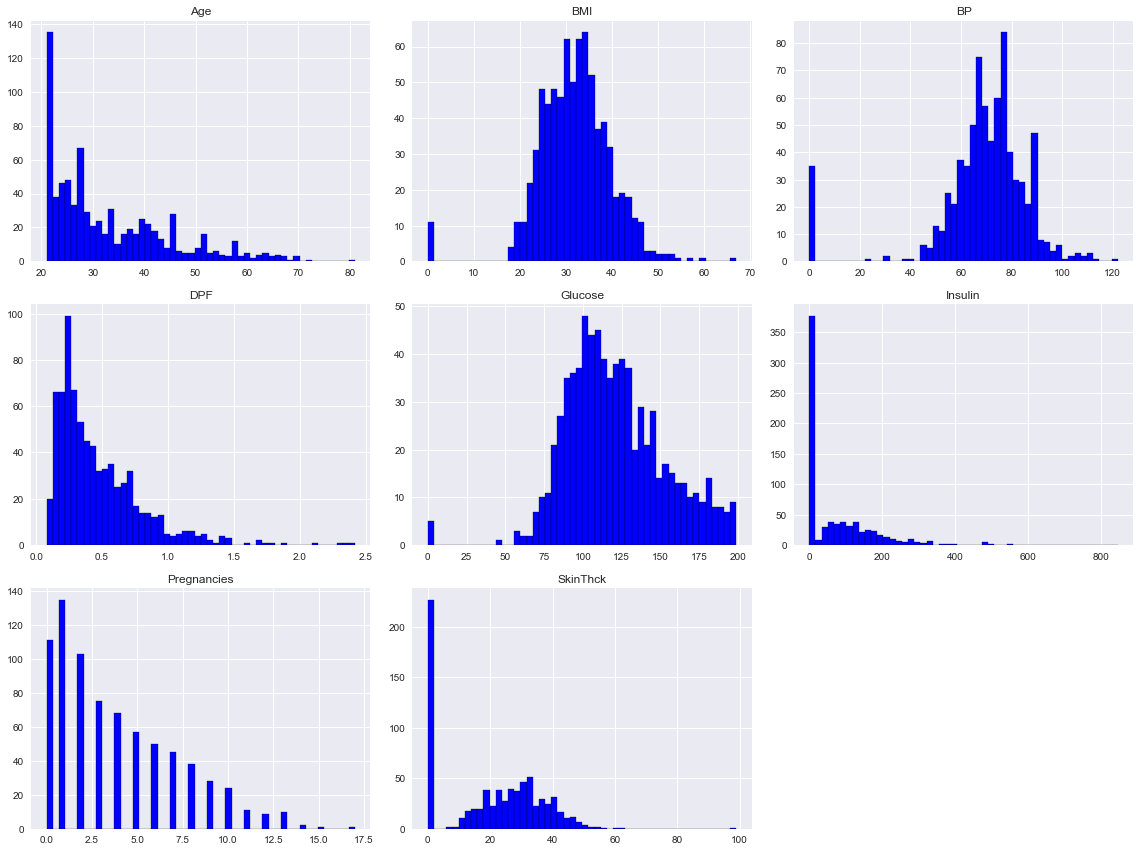

In [4]:
diabetes[['Age','BMI','BP','DPF','Glucose','Insulin','Pregnancies','SkinThck']].hist(bins=50,figsize=(16,12),color='b',edgecolor='black',histtype='bar')
plt.tight_layout()
plt.show()

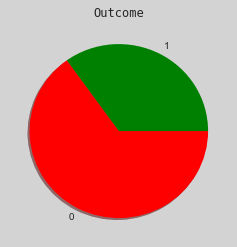

In [5]:
reload(pygraph)
pygraph.piechart(diabetes['Outcome'],shadow=True,colors=['g','r'],show=True)

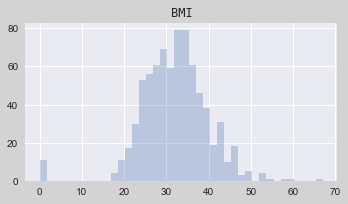

In [6]:
reload(pygraph)
pygraph.histogram(diabetes['BMI'],size=(5,3),show=True,bins=40)

In [7]:
def zero_features(feature):
    return feature[feature==0]

display(dict((x,zero_features(diabetes[x])) for x in ['BP','Glucose','SkinThck','BMI','Insulin']))

,BP
7,0
15,0
49,0
60,0
78,0
619,0
643,0
697,0
703,0
706,0


In [9]:

train_set,test_set = pyml.split_stratified(diabetes,diabetes['Outcome'],0.2,seed=42)
print('train [%i] test[%i]'%(len(train_set),len(test_set)))

train [614] test[154]


# `Explore Feature Correlations`

In [10]:
corr_matrix = train_set.corr()
display(corr_matrix)

,Pregnancies,Glucose,BP,SkinThck,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000,0.135,0.100,-0.121,-0.060,0.004,-0.052,0.536,0.208
Glucose,0.135,1.000,0.148,0.051,0.350,0.199,0.135,0.282,0.479
BP,0.100,0.148,1.000,0.156,0.087,0.270,0.023,0.216,0.082
SkinThck,-0.121,0.051,0.156,1.000,0.472,0.374,0.195,-0.115,0.094
Insulin,-0.060,0.350,0.087,0.472,1.000,0.204,0.239,-0.031,0.164
BMI,0.004,0.199,0.270,0.374,0.204,1.000,0.138,0.030,0.301
DPF,-0.052,0.135,0.023,0.195,0.239,0.138,1.000,0.025,0.165
Age,0.536,0.282,0.216,-0.115,-0.031,0.030,0.025,1.000,0.241
Outcome,0.208,0.479,0.082,0.094,0.164,0.301,0.165,0.241,1.000
object,float,float,float,float,float,float,float,float,float


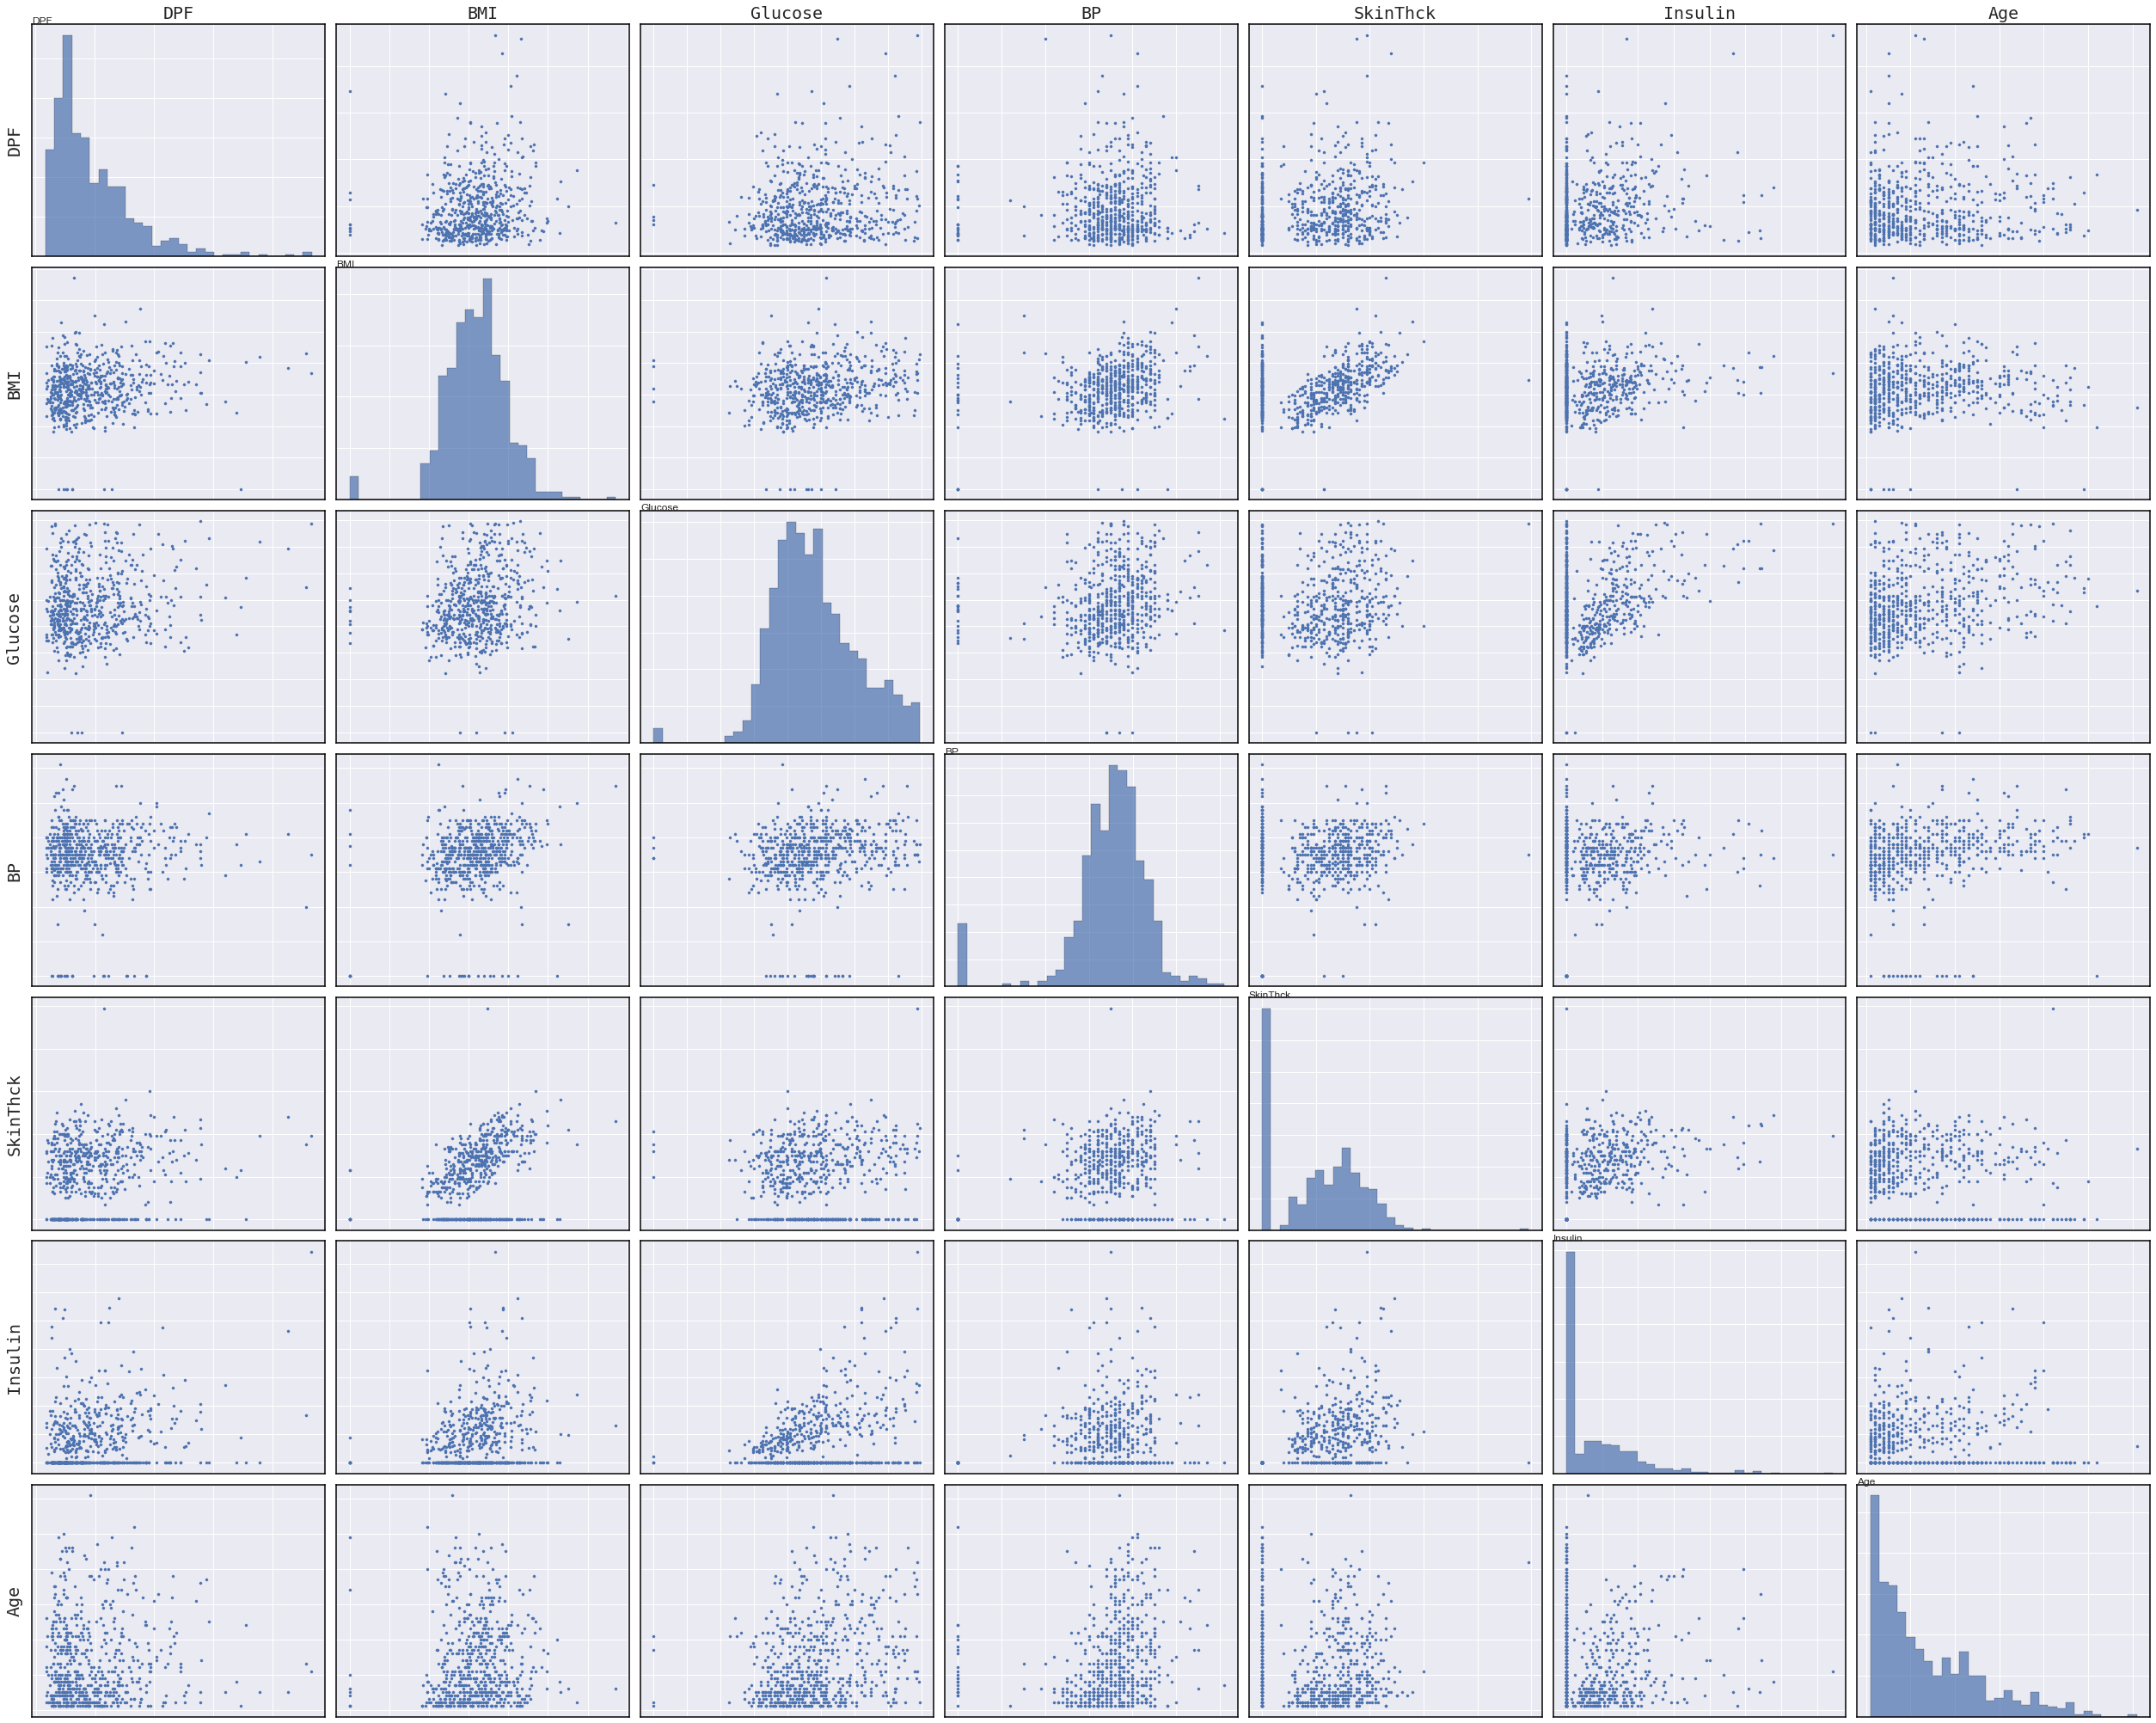

In [11]:
pygraph.scatterplot_matrix(train_set[['DPF','BMI','Glucose','BP','SkinThck','Insulin','Age']])
plt.show()

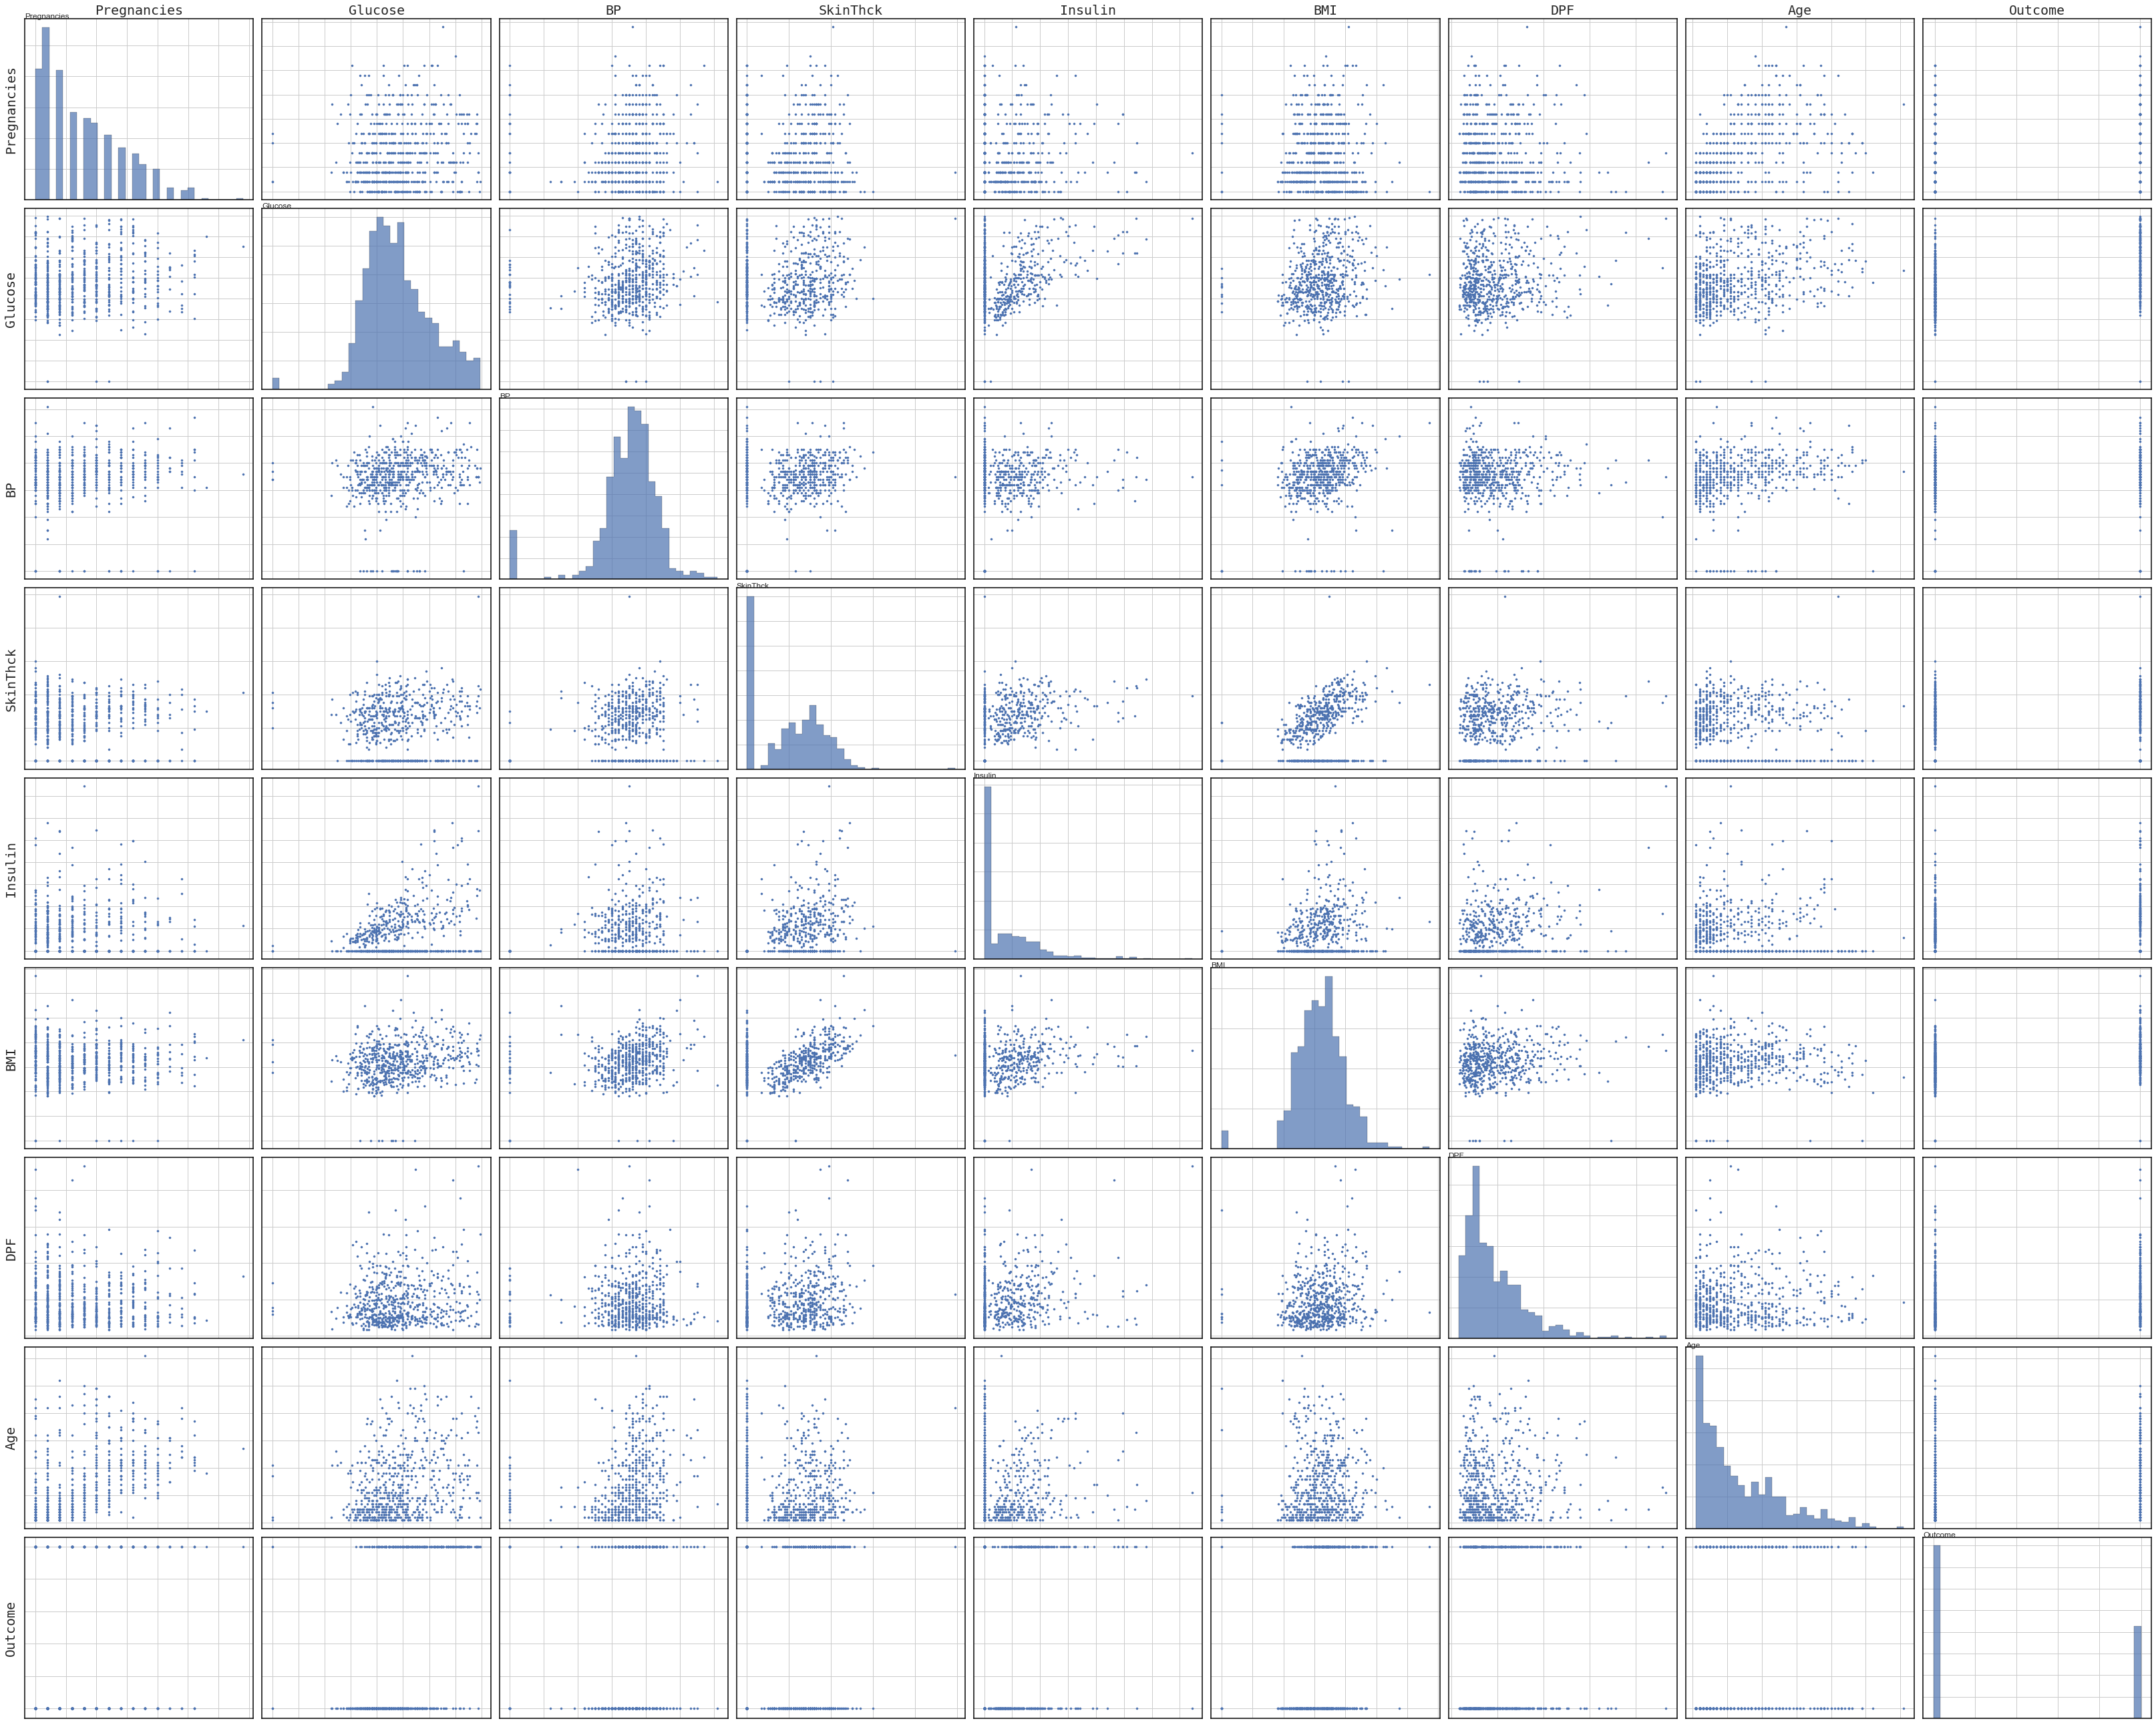

In [92]:
reload(pygraph)
pygraph.scatterplot_matrix(train_set)
plt.show()

<class 'matplotlib.gridspec.SubplotSpec'>
(3, 6, 0, 1)
Bbox(x0=0.125, y0=0.6702777777777778, x1=0.3575, y1=0.88)


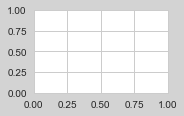

In [75]:
fig = plt.figure(facecolor='lightgrey')
grid = plt.GridSpec(3, 6,wspace=0.4,hspace=0.3)
g = grid[0,0:2]
print(type(g))
print(g.get_geometry())
print(g.get_gridspec())
print(g.get_position(fig))
print(g.get_topmost_subplotspec())
fig.add_axes(g.get_position(fig))
plt.show()

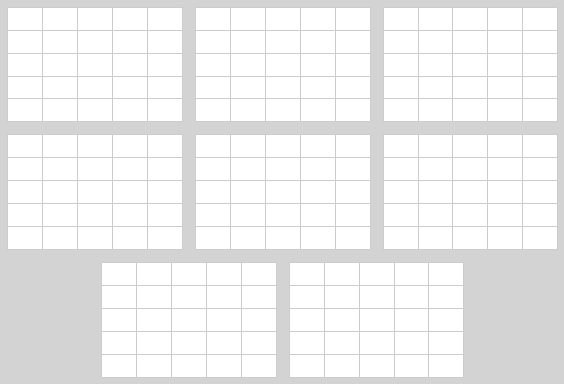

In [103]:
fig = plt.figure(facecolor='lightgrey')
grid = plt.GridSpec(3, 6)
subplt = [grid[0,0:2],grid[0,2:4],grid[0,4:6],grid[1,0:2],grid[1,2:4],grid[1,4:6],grid[2,1:3],grid[2,3:5]]
#ax = list(fig.add_axes(x.get_position(fig)) for x in subplt)
ax = list(fig.add_subplot(x,xticklabels=[],yticklabels=[]) for x in subplt)

#fig.subplots_adjust(hspace=0.4, wspace=0.4)
#ax1 = fig.add_axes([0.0, 0.0, 1.0, 0.50],xticklabels=[],yticklabels=[])
#print(type(ax1))
#ax2 = fig.add_axes([0.0, 0.53, 1.0, 0.50],xticklabels=[],yticklabels=[])
plt.tight_layout()
plt.show()

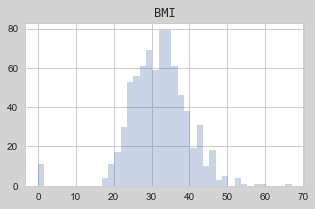

In [111]:
reload(pygraph)
pygraph.histogram(diabetes['BMI'],size=(5,3),show=True,bins=40)

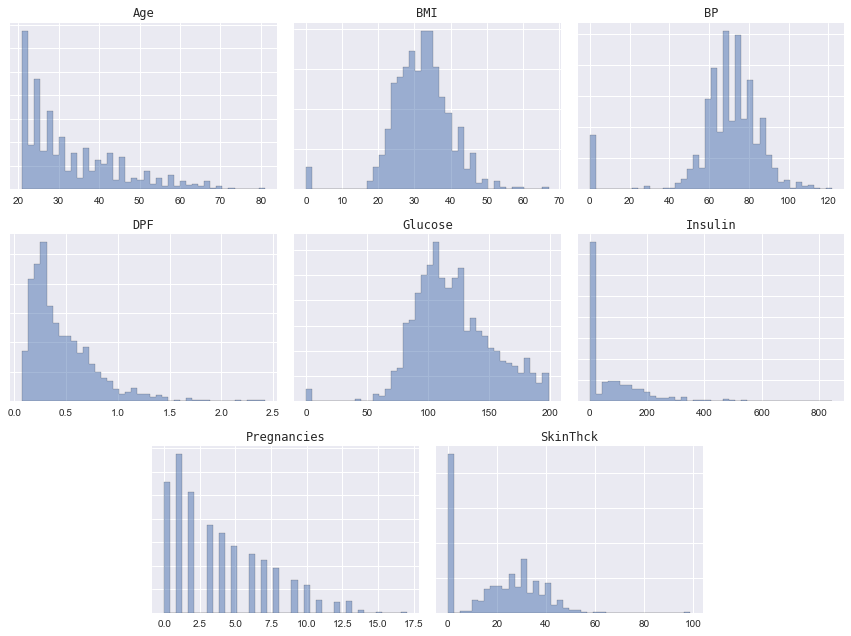

In [13]:
reload(pygraph)
pygraph.histogram(diabetes[['Age','BMI','BP','DPF','Glucose','Insulin','Pregnancies','SkinThck']],size=(4,3),show=True,bins=40,alpha=0.5,edgecolor='black')